# This notebook was written to showcase a typical data analytics pipline for a data driven building performance analysis

### Import necessary packages for the analysis

In [1]:
import pandas as pd # package for handling tables of data
import matplotlib.pyplot as plt # package for generating plots
import seaborn as sns # package similar to matplotlib with additional functionalities
import os
from datetime import date, timedelta # package for handling date-time formats
import numpy as np

In [33]:
# This code below makes the plot appear inside the browser.
%matplotlib inline
import mpld3
mpld3.enable_notebook()
plt.rcParams['figure.figsize'] = (13, 7)

In [3]:
repos_path = "C:/Users/MANOJ/the-building-data-genome-project/"

### We load the consumption of each building as a time series dataframe using pandas.  Data from each building was recorded at different time ranges.

In [4]:
time_series = pd.read_csv(os.path.join(repos_path,"data/raw/temp_open_utc.csv"), index_col="timestamp", parse_dates=True)

In [5]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40940 entries, 2010-01-01 08:00:00 to 2016-01-01 06:00:00
Columns: 507 entries, PrimClass_Jolie to PrimClass_Ulysses
dtypes: float64(507)
memory usage: 158.7 MB


#### 507 columns indicate that there are 507 building consumption data. Datetimeindex of 40940 indicates that many rows of timestamps ranging from 2010 to 2016 at 1 hour interval

In [12]:
time_series.head(5)

,PrimClass_Jolie,PrimClass_Jaylin,Office_Jesus,PrimClass_Jayla,PrimClass_Janiya,PrimClass_Janice,Office_Jett,Office_Jerry,PrimClass_Jaden,PrimClass_Jermaine,...,UnivLab_Aine,UnivLab_Anita,UnivLab_Alisa,UnivDorm_Adriana,UnivLab_Aoife,PrimClass_Uma,PrimClass_Umar,UnivDorm_Una,PrimClass_Uriah,PrimClass_Ulysses
timestamp,,,,,,,,,,,,,,,,,,,,,
2010-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## The metadata contains information on each building, such as:
### start data, end date, Heating type, industry, number of floors, occupants, space usage (office, lab, classroom), area, time-zone, age of the building, corresponding weather file.

In [8]:
metadata = pd.read_csv(os.path.join(repos_path,"data/raw/meta_open.csv"), index_col='uid', parse_dates=["datastart","dataend"], dayfirst=True)

In [9]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 507 entries, PrimClass_Everett to UnivLab_Aoife
Data columns (total 18 columns):
dataend                   507 non-null datetime64[ns]
datastart                 507 non-null datetime64[ns]
energystarscore           26 non-null float64
heatingtype               124 non-null object
industry                  507 non-null object
mainheatingtype           122 non-null object
numberoffloors            124 non-null float64
occupants                 105 non-null float64
primaryspaceusage         507 non-null object
rating                    131 non-null object
sqft                      507 non-null float64
sqm                       507 non-null float64
subindustry               507 non-null object
timezone                  507 non-null object
yearbuilt                 313 non-null object
nickname                  507 non-null object
primaryspaceuse_abbrev    507 non-null object
newweatherfilename        507 non-null object
dtypes: datetime64[ns](2),

In [10]:
metadata.tail(5)

,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename
uid,,,,,,,,,,,,,,,,,,
Office_Lane,2015-11-30 23:00:00,2014-12-01,NaN,Heat network,Education,Heat Network,8.0,NaN,Office,NaN,34455.2439,3201.000000,College/University,Europe/London,1907,Lane,Office,weather5.csv
Office_Cameron,2015-12-31 23:00:00,2015-01-01,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,53303.0000,4952.008609,College/University,America/New_York,1981,Cameron,Office,weather2.csv
UnivLab_Lea,2015-11-30 23:00:00,2014-12-01,NaN,Gas,Education,Gas,6.0,NaN,College Laboratory,NaN,16802.4479,1561.000000,College/University,Europe/London,1995,Lea,UnivLab,weather5.csv
UnivLab_Carlos,2015-12-31 23:00:00,2015-01-01,NaN,NaN,Education,NaN,NaN,NaN,College Laboratory,NaN,30143.0000,2800.375129,College/University,America/New_York,1951,Carlos,UnivLab,weather2.csv
UnivLab_Aoife,2015-12-31 23:00:00,2015-01-01,NaN,NaN,Education,NaN,NaN,NaN,College Laboratory,NaN,261188.0000,24265.148760,College/University,America/Phoenix,NaN,Aoife,UnivLab,weather0.csv


### Out of 507 building available in the dataframe, we choose one to visualize the consumption profile and the correlation of consumption with temperature and humidity.

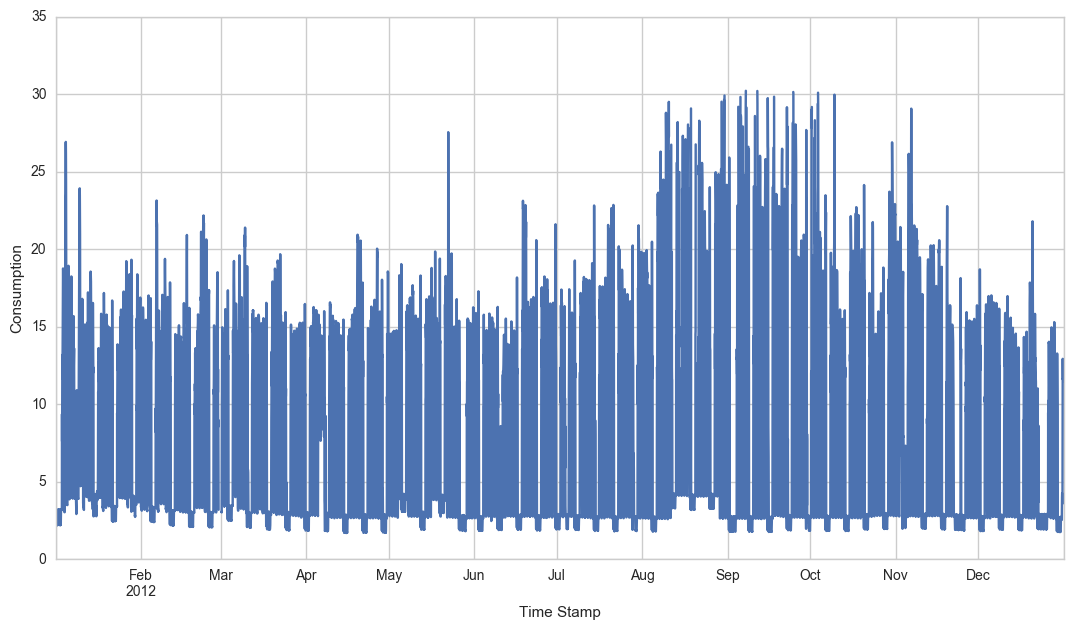

In [44]:
building_selected = 'Office_Elizabeth'

start = metadata.ix[building_selected]['datastart']
end = metadata.ix[building_selected]['dataend']

time_series[building_selected][start:end].plot()
plt.xlabel('Time Stamp')
plt.ylabel('Consumption')

In [53]:
weather_file = metadata[metadata.index == building_selected]['newweatherfilename'][building_selected]
weather = pd.read_csv(os.path.join(repos_path,"data/external/weather/",weather_file),index_col="timestamp", parse_dates=True)

In [54]:
start_date = '2012-02-01'
end_date = '2012-02-03'

In [55]:
temperature = weather[['TemperatureC']].resample('H').mean()
temperature = temperature[start_date:end_date]

humidity = weather[['Humidity']].resample('H').mean()
humidity = humidity[start_date:end_date]

In [56]:
office = time_series[[building_selected]][start_date:end_date]

In [57]:
# Function for normalize
def normalize(df):
    return (df-df.min())/(df.max()-df.min())

In [58]:
frame = normalize(office.join(temperature.join(humidity)))

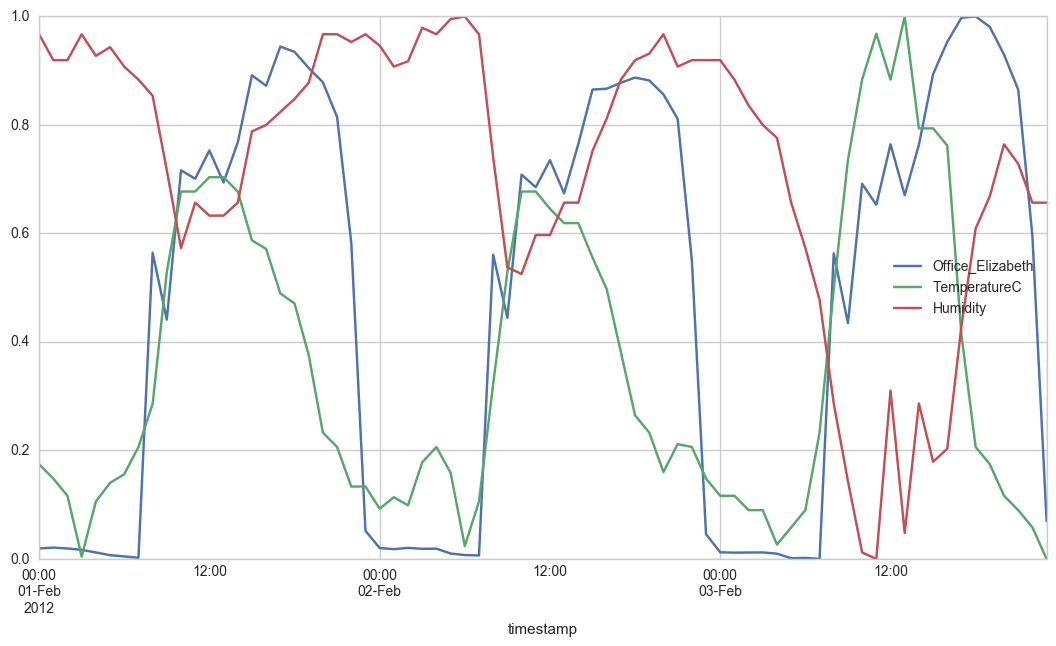

In [59]:
frame.plot()